# Выбираем станцию метро и точки в радиусе 1км

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
df = pd.read_csv('converted.csv',sep=";", header=0, index_col="ID_STOP")

In [2]:
sub = df.loc[df['STOP_NAME'] == "Чернышевская"]

In [3]:
sub

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
100113,Чернышевская,59.944575,30.359653


In [4]:
df=df.drop(df.loc[df['STOP_NAME'] == "Чернышевская"].index, inplace=False)

In [5]:
column_names = ["STOP_NAME", "LATITUDE", "LONGITUDE"]
Filter_df =  pd.DataFrame(columns = column_names)

In [6]:
from geopy import distance
subway = (float(sub['LATITUDE']), float(sub['LONGITUDE']))
for index, stops in df.iterrows():
    point = (stops['LATITUDE'], stops['LONGITUDE'])
    if (distance.distance(subway, point).km) <= 1:
        Filter_df = Filter_df.append(df.loc[index])

# Кластеризуем методом Kmeans

## Пробные шаги

In [7]:
from sklearn.cluster import KMeans

model = KMeans(max_iter=200, n_clusters=5, random_state=42, tol=0.0001, verbose=0)

In [8]:
model.fit(Filter_df[['LATITUDE','LONGITUDE']])

KMeans(max_iter=200, n_clusters=5, random_state=42)

In [9]:
model.labels_

array([2, 0, 0, 1, 4, 4, 1, 3, 0, 0, 0, 0, 2, 2, 0, 3, 0, 4, 0, 3, 0, 0,
       1, 1, 1, 3, 0, 0, 2, 1, 0, 0, 3, 3, 1, 1, 2, 2, 4, 1, 3, 2, 2, 1,
       0, 2], dtype=int32)

In [10]:
model.cluster_centers_

array([[59.94445911, 30.34808148],
       [59.94599224, 30.36781387],
       [59.93830139, 30.36193911],
       [59.94497058, 30.36005021],
       [59.94364359, 30.37522888]])

## Строим "локоть"

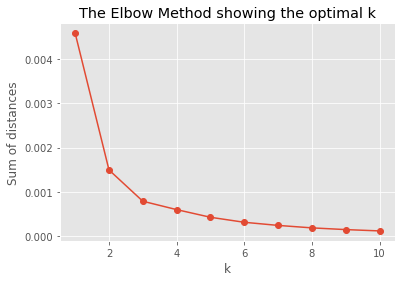

In [11]:
K = range(1,11)
models = [KMeans(n_clusters=k, random_state=42).fit(Filter_df[['LATITUDE','LONGITUDE']]) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Проверка 44кластеров

In [12]:
model = KMeans(n_clusters=44, random_state=42)
model.fit(Filter_df[['LATITUDE','LONGITUDE']])
Filter_df['cluster'] = model.labels_

In [13]:
Filter_df.groupby('cluster').size()

cluster
0     1
1     1
2     1
3     1
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    2
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
dtype: int64

In [14]:
import folium

#Create base map
map = folium.Map(location=[59.944575,30.359653], zoom_start = 14)

#Save the map


In [15]:
import random
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in Filter_df['cluster']]
def color_change(cluster):
    return color[cluster]

In [16]:
for index, stop in Filter_df.iterrows():
    point = (stop['LATITUDE'], stop['LONGITUDE'])
    #print(color_change(stop['cluster']))
    folium.CircleMarker(location=point, radius=9, fill_color = color_change(stop['cluster']), color="gray", fill_opacity = 0.9).add_to(map)
    

In [17]:
map